# Continuous Probabilistic Methods Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import mason_functions as mf

## Exercise I
Using lemonade.csv dataset and focusing on continuous variables:
* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
* Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
* Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [2]:
# load data
lemonade = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

# preview data
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
# look at df info
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
# read summary statistics
summary_stats = lemonade.describe()
summary_stats

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [5]:
# lower-case column names so I don't have to press the shift button as much
lemonade.columns = lemonade.columns.str.lower()

# set a list of numeric columns
numeric = ['temperature', 'rainfall', 'flyers', 'price', 'sales']

In [6]:
def distributions_grid(df, quant_vars):

    '''
    This function creates a nice sized figure, enumerates the list of features passed into the function, creates a grid of subplots,
    and then charts histograms for features in the list onto the subplots.
    '''

    plt.figure(figsize = (10, 8))   # create figure

    for i, cat in enumerate(quant_vars):    # loop through enumerated list
    
        plot_number = i + 1     # i starts at 0, but plot nos should start at 1
        
        plt.subplot(3, 2, plot_number)  # create subplot
        
        plt.title(cat)  # title
        
        df[cat].hist(color = 'indigo', edgecolor = 'mediumvioletred', lw = 2)   # display histogram for column

        plt.tight_layout(); # clean

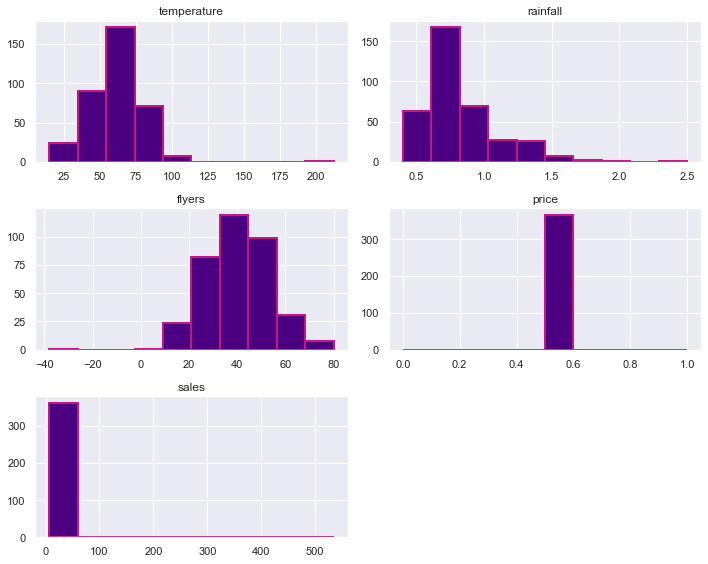

In [7]:
# plot histograms
distributions_grid(lemonade, numeric)

In [8]:
def boxplot_grid(df, quant_vars):

    '''
    This function creates a nice sized figure, enumerates the list of features passed into the function, creates a grid of subplots,
    and then charts boxplots for features in the list onto the subplots.
    '''
    
    plt.figure(figsize = (11, 7))   # create figure
    
    for i, cat in enumerate(quant_vars):    # loop through enumerated list
    
        plot_number = i + 1     # set plot_number to index + 1
        
        plt.subplot(2, 3, plot_number)  # create subplot
        
        plt.boxplot(df[cat])   # display boxplot for column
         
        plt.ylabel(cat)     # label y-axis

        plt.grid(True)      # show gridlines

        plt.tight_layout();    # clean

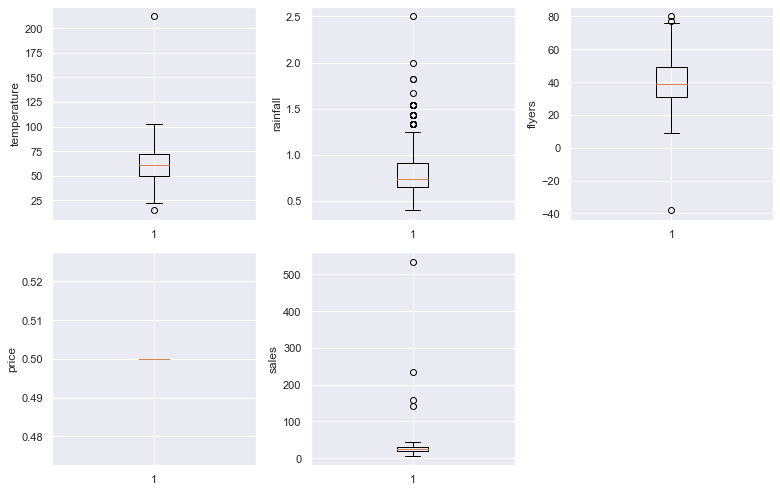

In [9]:
# plot boxplot distributions
boxplot_grid(lemonade, numeric)

### Exercise I A
* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [18]:
multiplier = 1.5    # set multiplier

for col in lemonade[numeric]:     # loop through numeric columns

    q1, q3 = lemonade[col].quantile([.25, .75])    # get quartiles
    
    iqr = q3 - q1    # calculate inter-quartile range
    
    inner_lower_fence = q1 - multiplier * iqr    # set lower fence
    
    inner_upper_fence = q3 + multiplier * iqr    # set upper fence
    
    print(lemonade[(lemonade[col] < inner_lower_fence) | (lemonade[col] > inner_upper_fence)]) # print outlier data

         date       day  temperature  rainfall  flyers  price  sales  \
41    2/11/17  Saturday        212.0      0.91      35    0.5     21   
364  12/31/17    Sunday         15.1      2.50       9    0.5      7   

     temperature_zscore  rainfall_zscore  flyers_zscore  price_zscore  \
41             8.336627         0.306792      -0.370227           NaN   
364           -2.550311         6.112037      -2.256137           NaN   

     sales_zscore  
41      -0.221847  
364     -0.674217  
         date        day  temperature  rainfall  flyers  price  sales  \
0      1/1/17     Sunday         27.0      2.00      15    0.5     10   
1      1/2/17     Monday         28.9      1.33      15    0.5     13   
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15   
5      1/6/17     Friday         25.3      1.54      23    0.5     11   
6      1/7/17   Saturday         32.9      1.54      19    0.5     13   
10    1/11/17  Wednesday         32.6      1.54      23    0.5   

In [13]:
numeric

['temperature', 'rainfall', 'flyers', 'price', 'sales']

In [15]:
# create z-scores for all numeric columns
for col in lemonade[numeric]:
    lemonade[f'{col}_zscore'] = (lemonade[col] - lemonade[col].mean()) / lemonade[col].std()

In [16]:
# observe supplemented dataframe
lemonade.head()

,date,day,temperature,rainfall,flyers,price,sales,temperature_zscore,rainfall_zscore,flyers_zscore,price_zscore,sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,NaN,-0.351096
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,NaN,-0.318783


## Exercise II
Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
* Use a 2 sigma decision rule to isolate the outliers.
    * Do these make sense?
    * Should certain outliers be kept or removed?

## Exercise III
Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv